# Cirq

## Installation

``pip install cirq``

## Import

In [144]:
import cirq
import math
import numpy as np

## Hello Qubit

In [3]:
# pick a qubit
qubit = cirq.LineQubit(0) # position 0

# create a circuit
circuit = cirq.Circuit()
circuit.append(cirq.measure(qubit))

print("Circuit")
print(circuit)

Circuit
0: ───M───


# NOT

In [4]:
# pick a qubit
qubit = cirq.LineQubit(0) # position 0

# create a circuit
circuit = cirq.Circuit()
circuit.append(cirq.X(qubit))
circuit.append(cirq.measure(qubit))

print("Circuit")
print(circuit)

Circuit
0: ───X───M───


# CNOT

In [5]:
# pick qubits
qubit0 = cirq.LineQubit(0) # position 0
qubit1 = cirq.LineQubit(1) # position 1

circuit = cirq.Circuit()
circuit.append(cirq.CNOT(control=qubit0, target=qubit1))
circuit.append(cirq.measure(qubit1))

print("Circuit")
print(circuit)

Circuit
0: ───@───────
      │
1: ───X───M───


## Hadamard

Circuit
0: ───H───M───
Result
0=01000001000001101001110010100100111111111011011111001001001101100000001101011010101101110000110101011100110010011000101100100000111111100100101010000010111101011010011110000111111111101100011001000001010111010001000110101010001101110001111101011110010000000110010100101111110011000110100001101101101001101101111101100100101000101001011110011111101000111111111010100111111111111010101011101110110010001000111001101101011001111011101100110000111101010010011101000111011101011000010010111110101010100010111010011100110010101100011001111110110110010110010001110111001111001101101111100011001000011101001000010000100000010000000010110001001000110110101110101110111010010010000001110100001011010100101001000101110111111110001000111111110101001010001010000100101010101001110000100100000110001010100011100001100110101101000011101100001111100010001100011000000100100101111101011010000000000011000001110101100110000001011111000110100010010111001011111100001001010111011111101101

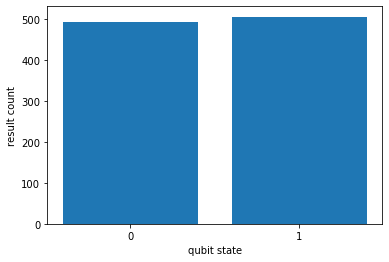

array([494., 506.])

In [6]:
# pick a qubit
qubit = cirq.LineQubit(0) # position 0

# create a circuit with HADAMARD
circuit = cirq.Circuit(
    cirq.H(qubit),
    cirq.measure(qubit)
)

print("Circuit")
print(circuit)

# simulate
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

print("Result")
print(result)

cirq.plot_state_histogram(result)

# Deutsch Algorithm

#### Structure of Circuits in Cirq
- **Circuit:** Collection of Moments
- **Moment:** Collection of Operations at a specific "time"
- **Operation:** Effect that operates on a specific subset of qubits

In [87]:
# 2 qubits
qubit0 = cirq.LineQubit(0)
qubit1 = cirq.LineQubit(1)

def get_oracle_gate(oracle):
    rnd = np.random.randint(2)
    # if oracle is constant
    if oracle == "c":
        if rnd == 1:
            return [cirq.I(qubit0), cirq.X(qubit1)]
        else:
            return [cirq.I(qubit0), cirq.I(qubit1)]
    # if oracle is balanced
    else:
        if rnd == 1:
            return [cirq.CNOT(control=qubit0, target=qubit1), cirq.X(qubit1)]
        else:
            return cirq.CNOT(control=qubit0, target=qubit1)

# moments
moment_h_all = cirq.Moment( [cirq.H(qubit0), cirq.H(qubit1)] )
moment_m_all = cirq.Moment( [cirq.measure(qubit0), cirq.measure(qubit1)] )

# circuit
circuit = cirq.Circuit()
circuit.append(cirq.X(qubit1))
circuit.append(moment_h_all)

circuit.append(get_oracle_gate("b")) # insert oracle gate
#circuit.append(get_oracle_gate("c"))

circuit.append(moment_h_all)
circuit.append(moment_m_all)

#circuit.append(cirq.H(qubit0))
#circuit.append(cirq.measure(qubit0))

print("Circuit")
print(circuit)

Circuit
0: ───────H───@───────H───M───
              │
1: ───X───H───X───X───H───M───


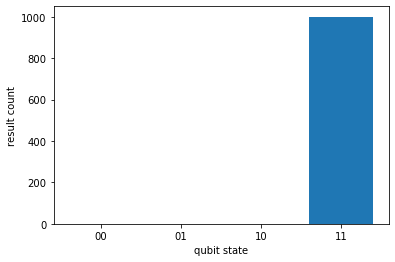

array([   0.,    0.,    0., 1000.])

In [88]:
# simulate
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

cirq.plot_state_histogram(result)

# Deutsch-Josza Algorithm

In [127]:
# n qubits
n_qubits = 5

# pick up qubits
qubits = [cirq.LineQubit(x) for x in range(n_qubits+1)]

# oracle gate
def get_oracle_gate(oracle):
    rnd = np.random.randint(2)
    # if oracle is constant
    if oracle == "c":
        if rnd == 1:
            gate = [cirq.I(qubit) for qubit in qubits[:-1]]
            gate.append(cirq.X(qubits[n_qubits]))
            return gate
        else:
            return [cirq.I(qubit) for qubit in qubits]
    # if oracle is balanced
    else:
        if rnd == 1:
            gate = [cirq.CNOT(control=qubit, target=qubits[n_qubits]) for qubit in qubits[:-1]]
            gate.append(cirq.X(qubits[n_qubits]))
            return gate
        else:
            return [cirq.CNOT(control=qubit, target=qubits[n_qubits]) for qubit in qubits[:-1]]

# gates
gate_x_last = cirq.X(qubits[n_qubits])
gate_h_all = [cirq.H(qubit) for qubit in qubits]
gate_m_all = [cirq.measure(qubit) for qubit in qubits]
gate_h_all_ex_last = [cirq.H(qubit) for qubit in qubits[:-1]]
gate_m_all_ex_last = [cirq.measure(qubit) for qubit in qubits[:-1]]

In [128]:
# moments
moment_x_last = cirq.Moment([gate_x_last])
moment_h_all = cirq.Moment(gate_h_all)
moment_m_all = cirq.Moment(gate_m_all)
moment_h_all_ex_last = cirq.Moment(gate_h_all_ex_last)
moment_m_all_ex_last = cirq.Moment(gate_m_all_ex_last)

In [142]:
# circuit
circuit = cirq.Circuit()
circuit.append(moment_x_last)
circuit.append(moment_h_all)

circuit.append(get_oracle_gate("b"))

circuit.append(moment_h_all_ex_last)
circuit.append(moment_m_all_ex_last)

print("Circuit")
print(circuit)

Circuit
0: ───────H───@───────────────────H───M───
              │
1: ───────H───┼───@───────────────H───M───
              │   │
2: ───────H───┼───┼───@───────────H───M───
              │   │   │
3: ───────H───┼───┼───┼───@───────H───M───
              │   │   │   │
4: ───────H───┼───┼───┼───┼───@───H───M───
              │   │   │   │   │
5: ───X───H───X───X───X───X───X───────────


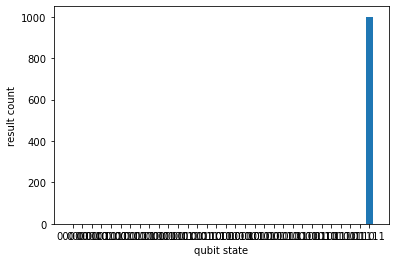

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0., 1000.])

In [143]:
# simulate
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

cirq.plot_state_histogram(result)